## Project On Mall custpmers

### Mall Customer Segmentation Data - Clustering and Analysis

1. Importing the libraries
A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs. It makes Python Programming simpler and convenient for the programmer. As we don't need to write the same code again and again for different programs.

In this notebook, we will be using the following libraries.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [48]:
ds = pd.read_csv('Mall_Customers.csv')
ds.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
ds.shape

(200, 5)

### Exploratory Data Analysis

#### Missing Data

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### EDA

In [8]:
ds.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
ds['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

plt.figure(figsize=(3,3))
pd.Series(ds['Gender']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

In [26]:
ds.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


### Plotting the Annual Income Column vs the Spending Score

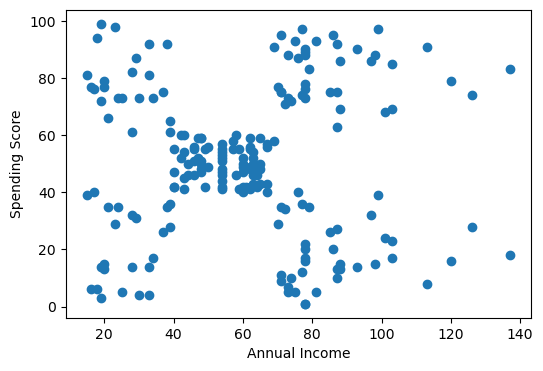

In [71]:
plt.figure(figsize = (6, 4))
plt.scatter(ds["Annual Income (k$)"], ds["Spending Score (1-100)"])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

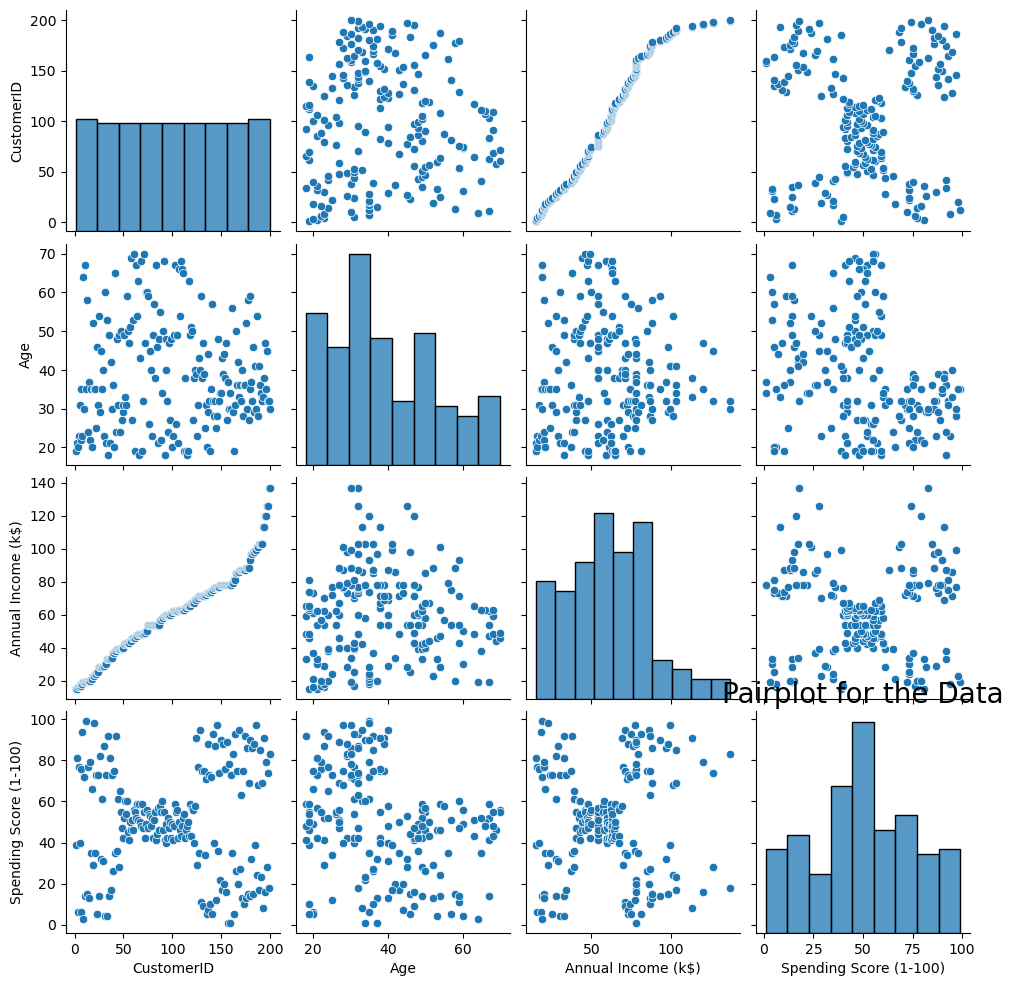

In [31]:
sns.pairplot(ds)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

##### converting Gender column datatype from object to int

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(ds['Gender'])
label

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [51]:
ds.drop("Gender", axis=1, inplace=True)
 
ds["Gender"] = label
 
ds

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


### Heatmap of Data

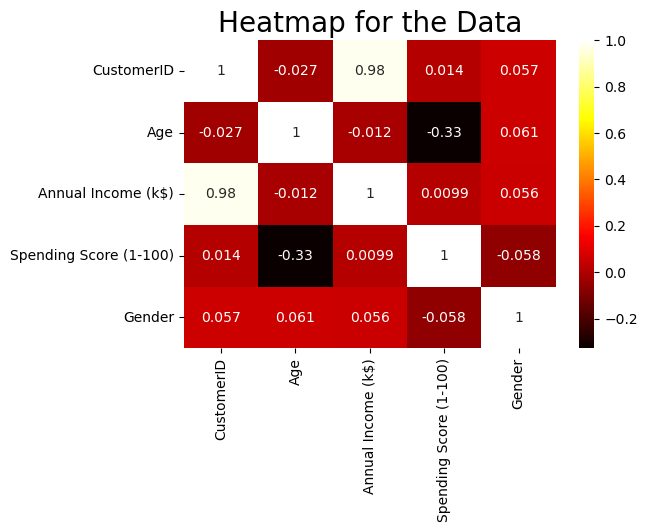

In [58]:
plt.figure(figsize=(6,4))
sns.heatmap(ds.corr(), cmap = 'hot', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

### Analysis between Gender and Spending Score

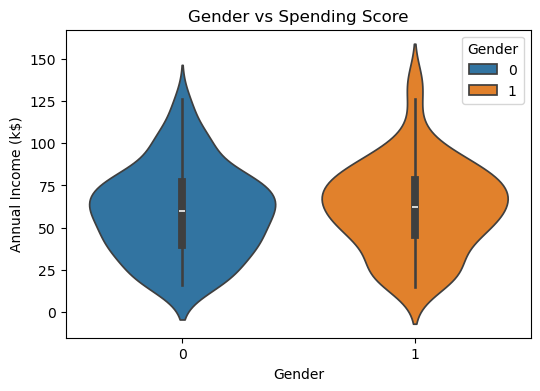

In [69]:
plt.figure(figsize=(6, 4))

sns.violinplot(x='Gender', y='Annual Income (k$)', data=ds,hue = 'Gender')
plt.title('Gender vs Spending Score')

plt.show()

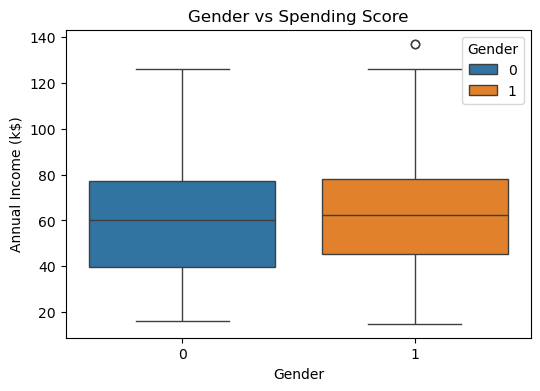

In [70]:
plt.figure(figsize=(6,4))

sns.boxplot(x='Gender', y='Annual Income (k$)', data=ds,hue = 'Gender')
plt.title('Gender vs Spending Score')

plt.show()
